<a href="https://colab.research.google.com/github/sebaszx/Tarea4Modulo2CienciasDatos/blob/main/Tarea_4_Parte_Pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para usar este código se necesitan descargar este .ipynb justo con la carpeta YOLO-Object-Detection que se encuentra [aquí](https://drive.google.com/drive/folders/1xG166g0eGVJwATuvtSQKb6g2TYSZRQdG?usp=sharing). Ya se le dieron los permisos necesarios al asistente por si se llegara a necesitar probar este código.

In [ ]:
 !pip uninstall utils
!fusermount -u drive
!google-drive-ocamlfuse drive

fusermount: failed to unmount /content/drive: No such file or directory
/bin/bash: google-drive-ocamlfuse: command not found


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks/Ciencia\ de\ los\ dato/Modulo\ 2/Sesión\ 07/YOLO-Object-Detection

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Ciencia de los dato/Modulo 2/Sesión 07/YOLO-Object-Detection


In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/Ciencia de los dato/Modulo 2/Sesión 07/YOLO-Object-Detection


#Imports

Cv2: Librería para el uso de imágenes

matplotlib: Librería para el despliegue de gráficos e imágenes

utils: Librería que contiene funciones auxiliares

Darknet: Darknet es un framework para redes neuronal de código abierto escrito en C y CUDA.

In [ ]:

import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

# Arquitectura y pesos

* En esta sección se cargan la arquitectura de la red Yolo v3 desde el archivo yolov3.cfg

* Se cargan los pesos de la red pre entrenada con el archivo yolov3.weights

* Se cargan las clases con el archivo coco.names


La red fue entrenada con el dataset COCO (Common Objects in Context)


In [ ]:

cfg_file = './cfg/yolov3.cfg'


weight_file = './weights/yolov3.weights'


namesfile = 'data/coco.names' #80 clases

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

#Estructura de la red

In [ ]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

# Procesado de las Imágenes

OpenCv carga las imagenes en formato BGR, pero el algoritmo las necesita en RGB para poder desplegarlas con los colores correctos

La red necesita que las imágenes de entrada sean de tamaño 416 * 416 * 3 



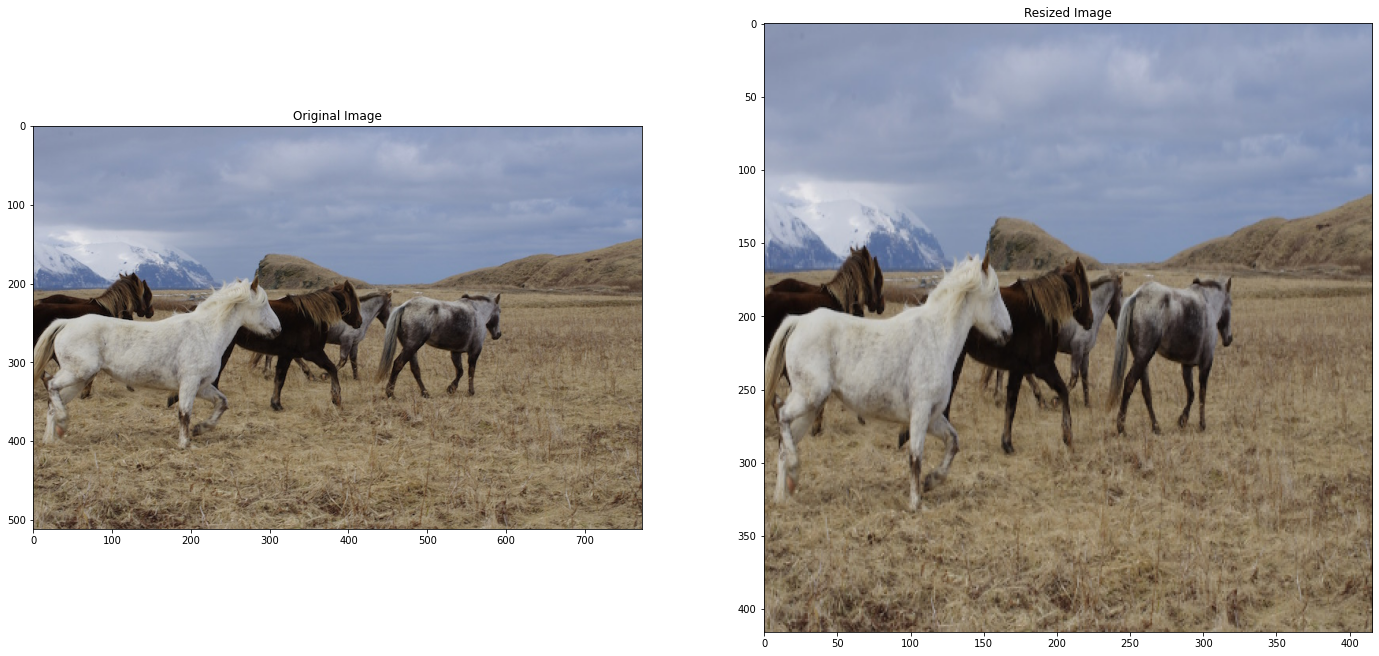

In [ ]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/horses.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

#Hiperparámetros

## Non-Maximal Suppression (NMS)

YOLO usa NMS para mantener solo el mejor cuadro delimitador. El primer paso en NMS es eliminar todos los cuadros delimitadores predichos que tienen una probabilidad de detección menor que un umbral NMS dado.

In [ ]:
# Set the NMS threshold
nms_thresh = 0.6  

##  Intersection Over Union (IOU)

Después de eliminar todos los cuadros delimitadores predichos que tienen una probabilidad de detección baja, el segundo paso en NMS es seleccionar los cuadros delimitadores con la probabilidad de detección más alta y eliminar todos los cuadros delimitadores cuyo valor de Intersección sobre unión (IOU) sea mayor que un valor determinado.

In [ ]:
# Set the IOU threshold
iou_thresh = 0.9

# Test o Fordward Propagation



It took 1.448 seconds to detect the objects in the image.

Number of Objects Detected: 4 

Objects Found and Confidence Level:

1. horse: 0.999932
2. horse: 0.998392
3. horse: 0.999996
4. horse: 0.999998


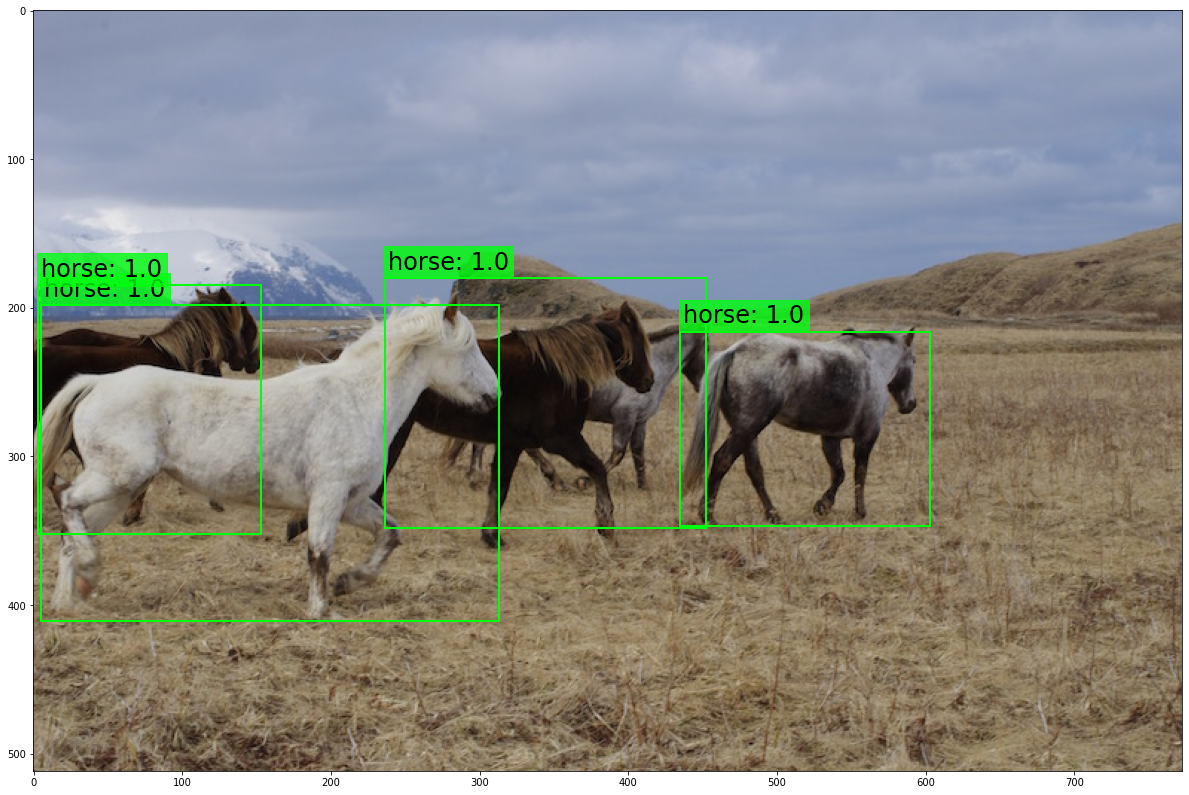

In [14]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/horses.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the IOU threshold. Default value is 0.4
iou_thresh = 0.4

# Set the NMS threshold. Default value is 0.6
nms_thresh = 0.8

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)